# Comparison of Boxsize

In [1]:
# Import modules
import sys, os, h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.transforms import Bbox

filepath = os.getcwd()
homepath = filepath.split('data')[0]
sys.path.insert(1, homepath + 'python')

import zonalflow, h5tools, derivative, plot

# Plot parameter
%matplotlib inline
plot.parameters(True, 32, (24,8), 300)

## $R/L_T$ = 6.0


### $N_s$ = 16 &nbsp; $N_{vpar}$ = 48 &nbsp; $N_\mu$ = 9

#### Boxsize Xx1

In [2]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize1x1/Ns16/Nvpar48/Nmu9', 'boxsize2x1/Ns16/Nvpar48/Nmu9',
        'boxsize3x1/Ns16/Nvpar48/Nmu9', 'boxsize4x1/Ns16/Nvpar48/Nmu9/Run1']


filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

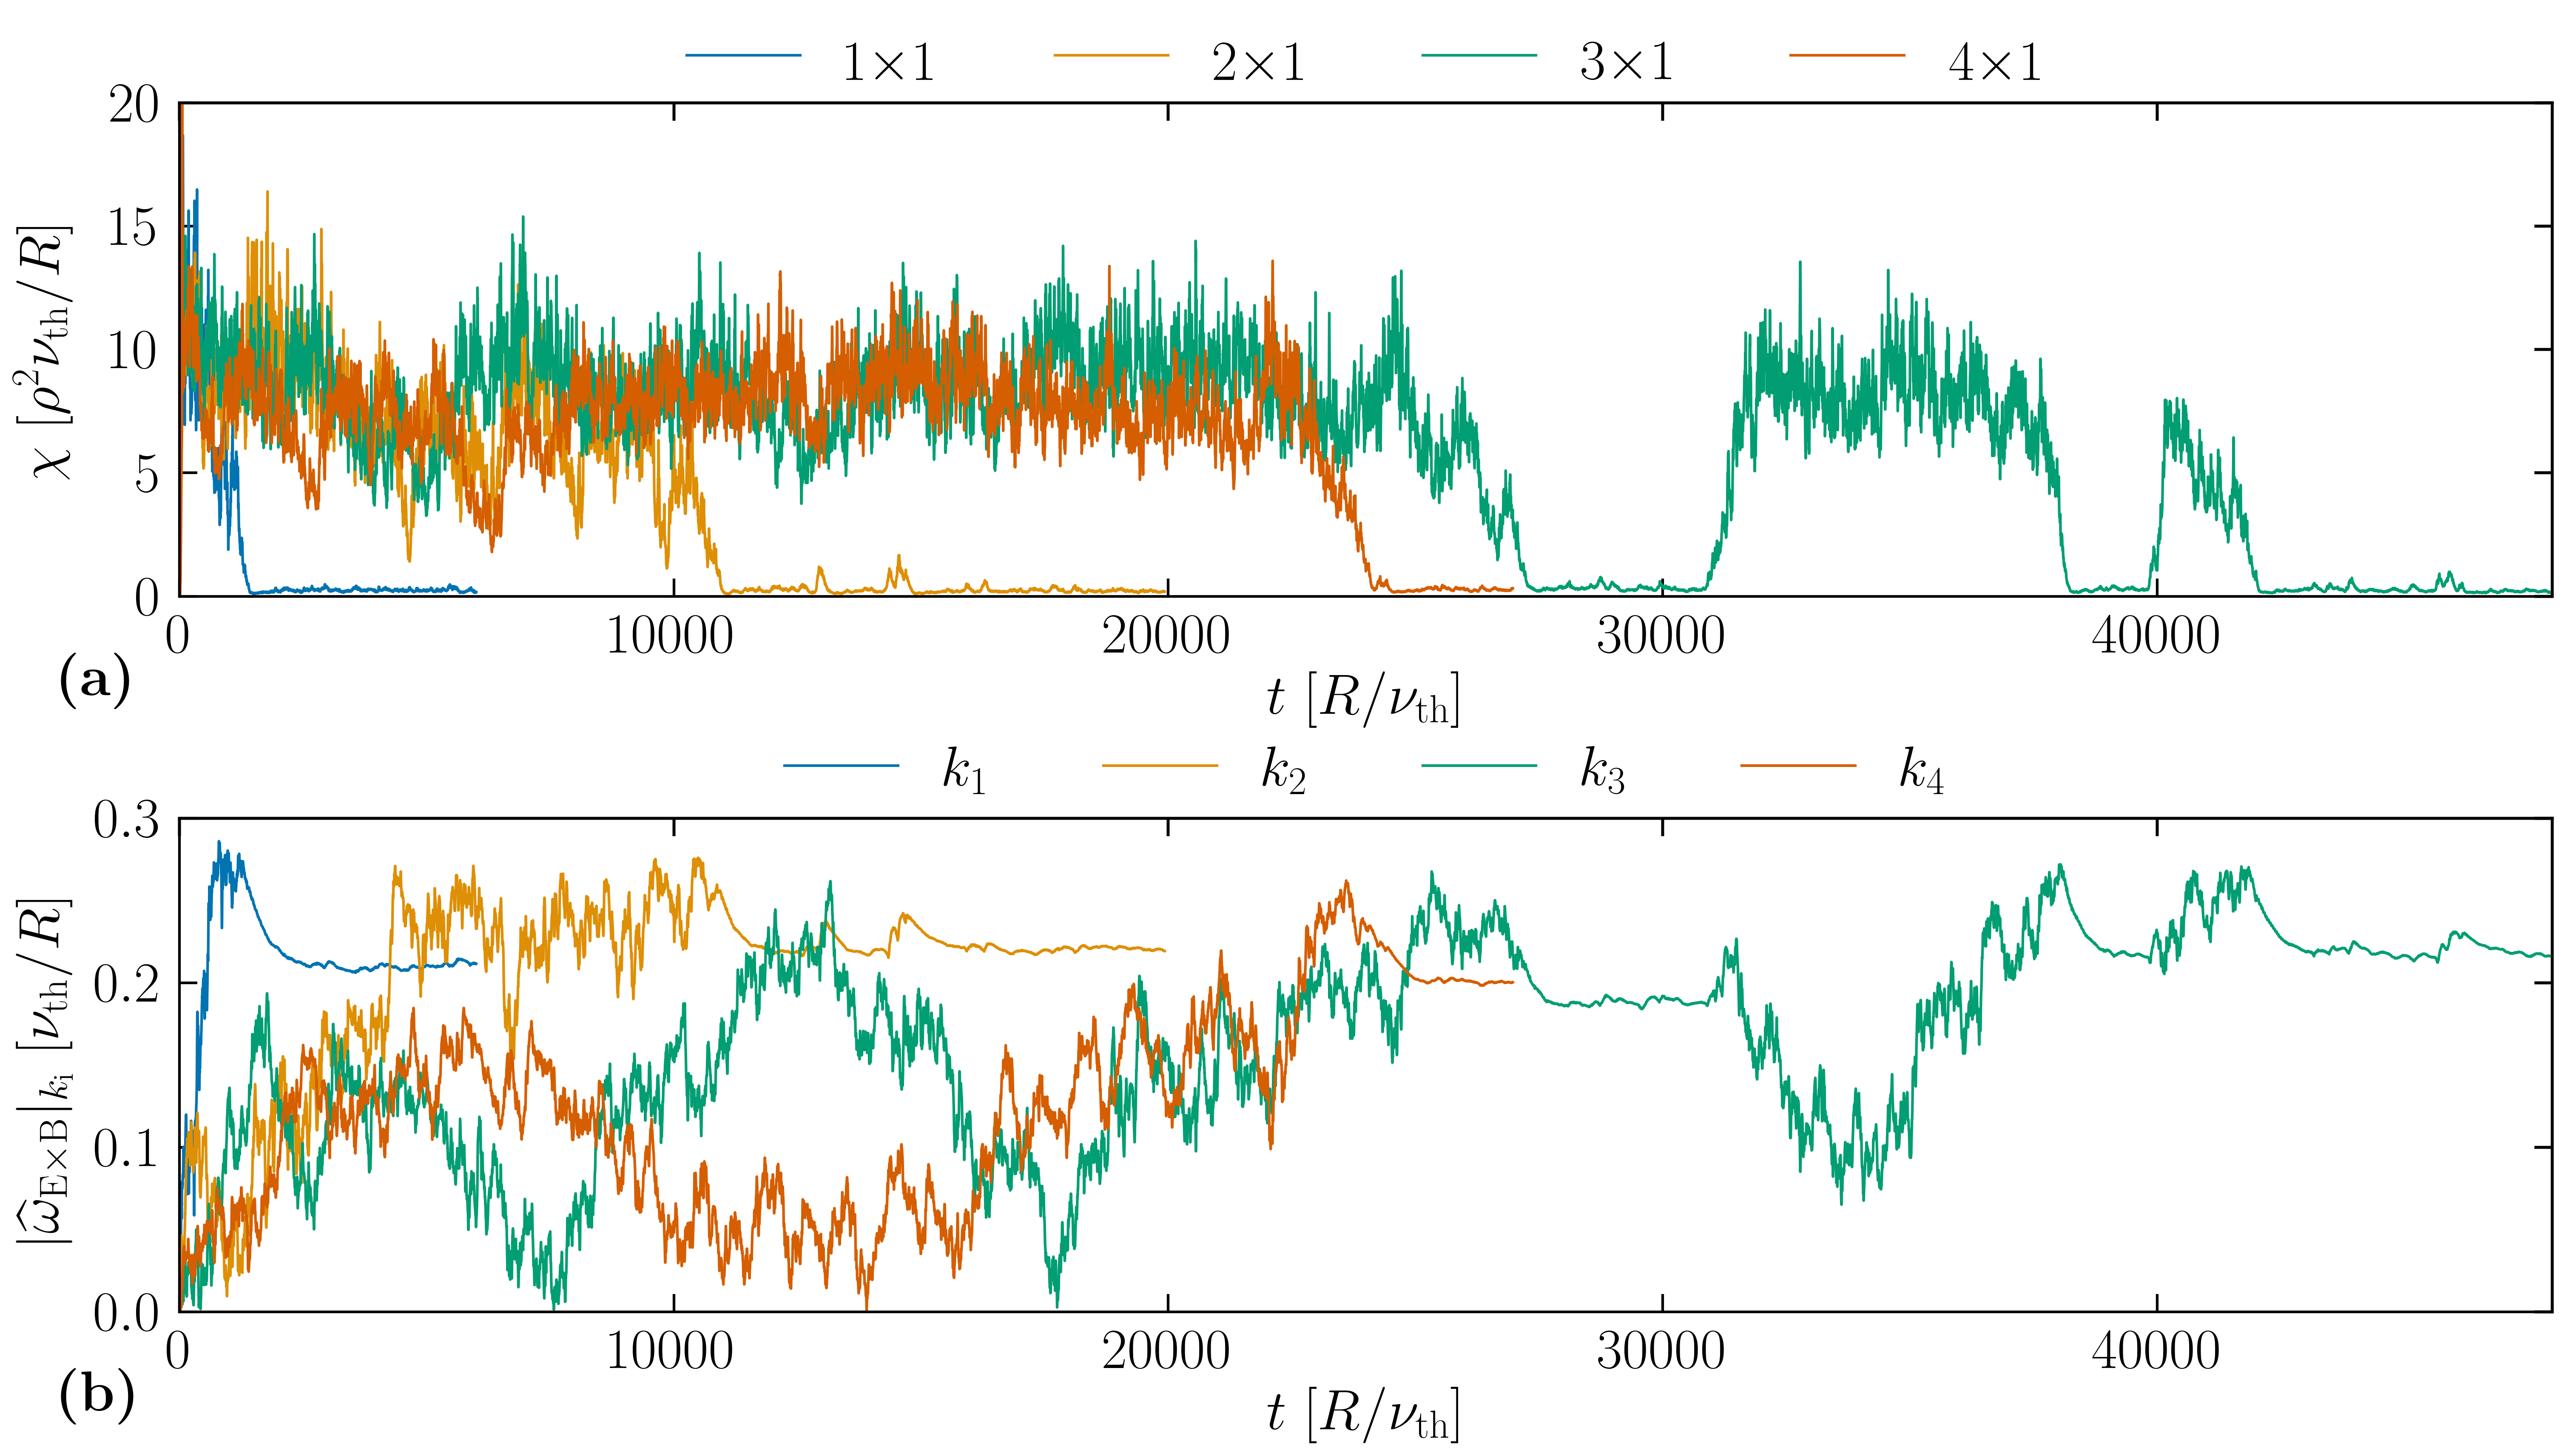

In [4]:
# Compare eflux and amplitude in time domain
fig, (ax_eflux, ax_wexb_max) = plt.subplots(2, 1, figsize = (24,12)) #, sharex=True)

boxsize = [r'1$\times$1', r'2$\times$1', r'3$\times$1', r'4$\times$1']

#ax_eflux.set_title(r'$N_s$ = 16,   $N_{\mathrm{vpar}}$ = 48,   $N_{\mathrm{\mu}}$ = 9', pad=20)
ax_eflux.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux.yaxis.set_label_coords(-0.045,0.5)

ax_wexb_max.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max.set_ylabel(r'$|\widehat{\omega}_{\mathrm{E \times B}}|_{k_\mathrm{i}}~[\nu_{\mathrm{th}}/R]$')
ax_wexb_max.yaxis.set_label_coords(-0.045,0.5)


fourier_index = 1
x_max = 0
max_index = [None, None, None, 45000]

for i, n, k in zip(f, boxsize, max_index):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:k], time[:k]

    ax_eflux.plot(time, eflux, label=n)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    if x_max < time[-2]:
        x_max = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=x_max)
    ax_eflux.set_ylim(ymin=0, ymax=20)
    
    ax_eflux.legend(loc='upper center', bbox_to_anchor=(0.5, 1.24), ncol=4, frameon=False)
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[fourier_index][:k], label= r'$k_' + str(fourier_index) + r'$')
    
    fourier_index += 1
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=x_max)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.30)
    
    ax_wexb_max.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False)

#plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=0.9, wspace=0.4, hspace=0.45)

plot.savefig_subplot(fig, ax_eflux   , picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_eflux_comparison.pdf'   , pad=0.02)
plot.savefig_subplot(fig, ax_wexb_max, picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_max_comparison.pdf', pad=0.02)

handles_eflux, labels_eflux = ax_eflux.get_legend_handles_labels(), ax_eflux.get_legend_handles_labels()

ax_eflux.text(-0.05, -0.2, r'\bf{(a)}', transform=ax_eflux.transAxes)
ax_wexb_max.text(-0.05, -0.2, r'\bf{(b)}', transform=ax_wexb_max.transAxes)

plt.savefig(picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_comparison.pdf', bbox_inches='tight')

In [17]:
# bbox for 2x1-2 and 3x1-3 
bbox_ax_eflux = ax_eflux.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
bbox_ax_wexb_max = ax_wexb_max.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())

##### Shearung rate $\omega_{E \times B}$

In [2]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize4x1/Ns16/Nvpar48/Nmu9/Run1', 'boxsize3x1/Ns16/Nvpar48/Nmu9',
        'boxsize2x1/Ns16/Nvpar48/Nmu9', 'boxsize1x1/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

In [3]:
# linear growth rate
lineargrowth = pd.read_csv(homepath + 'data/linear_growthrate_ITG.dat', index_col=0)

lineargrowth_rlt = lineargrowth['gamma_N'][float(data.split('rlt')[1])]
lineargrowth_rlt_color = 'grey'

In [4]:
# Plot parameter
%matplotlib inline
plot.parameters(True, 40, (24,8), 300, linewidth=2)

In [6]:
# parameter vor white plots
plt.rcParams['xtick.color']='white'
plt.rcParams['ytick.color']='white'
plt.rcParams['axes.labelcolor']='white'
plt.rcParams['axes.edgecolor']='white'
plt.rcParams['lines.color']='white'
plt.rcParams['text.color']='white'

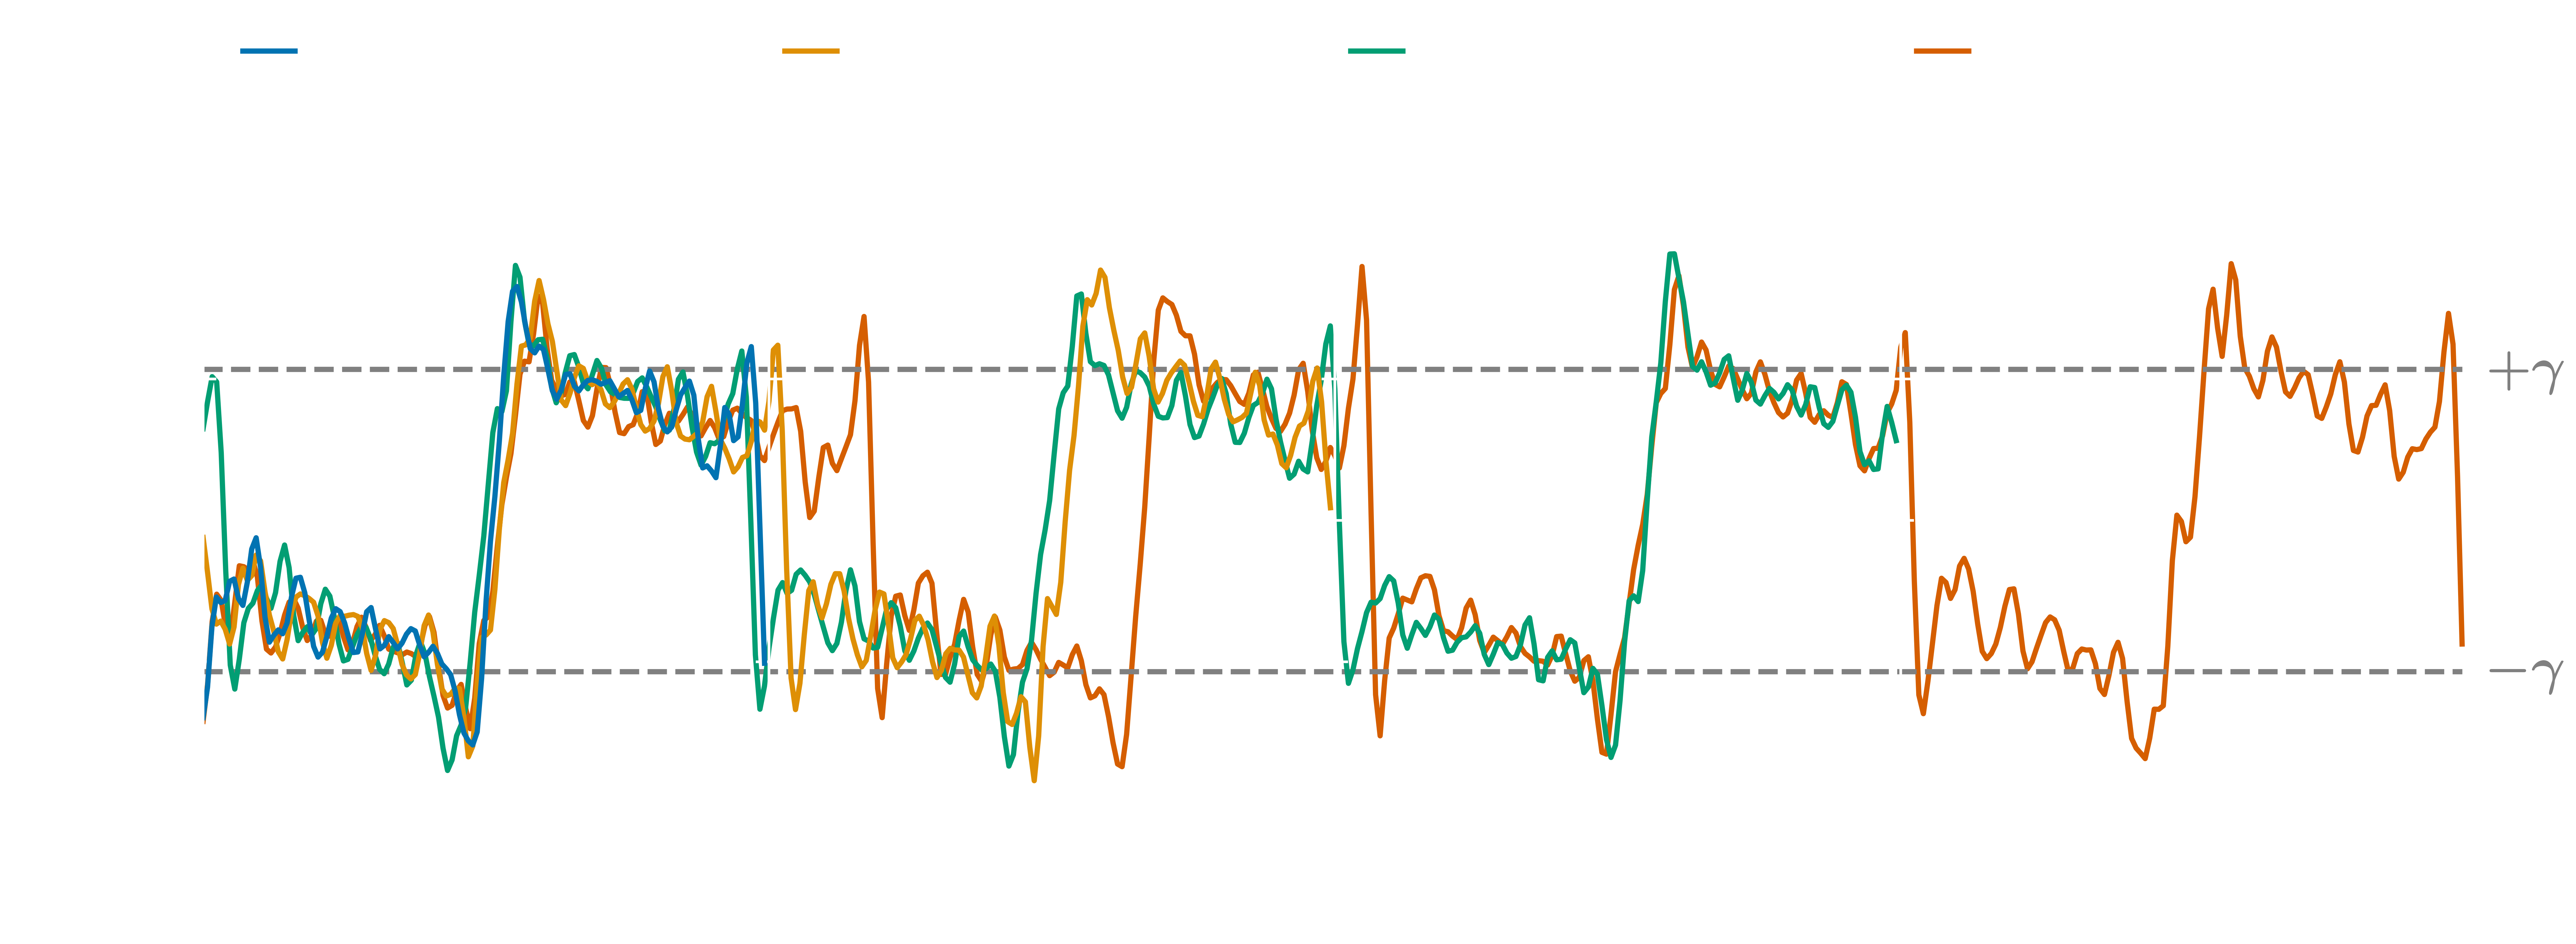

In [7]:
# Compare shearing rate in radial domain
fig = plt.figure(1, figsize = (24,6))

ax4 = fig.add_axes([0, 0, 4/4, 1])
ax3 = fig.add_axes([0, 0, 3/4, 1])
ax2 = fig.add_axes([0, 0, 2/4, 1])
ax1 = fig.add_axes([0, 0, 1/4, 1])

boxsize = [r'4 \times 1', r'3 \times 1', r'2 \times 1', r'1 \times 1']
colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00']
#colors = ['#9a00ff','#ffad00', '#0cbf0f', '#fc0307']


axes = [ax4, ax3, ax2, ax1]
interval = np.array([[26000, 43000, 15000, 2000],
                     [28000, 45000, 18000, 5000]])

def rotate(l, n):
    return np.concatenate((l[n:],l[:n]))

i = 4

for ax, b, file in zip(axes, boxsize, f):

    if i < 4:
        ax.set_facecolor('none')        
        
        axR = ax.secondary_yaxis('right')
        axR.tick_params(direction = "out")
        axR.yaxis.set_ticklabels([])
        
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
    
    # Load shering rate and time
    eflux_data, time = zonalflow.get_eflux_time(file)
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(file)
    
    start, end = zonalflow.get_index_from_value(time,interval[0][4-i]) , zonalflow.get_index_from_value(time,interval[1][4-i])
    start_time, end_time = interval[0][4-i], interval[1][4-i]
    
    # Shearing rate with mean over time
    wexb_rad_mean, wexb_rad_middle = zonalflow.get_mean_middle_shearingrate(start, end, wexb)
    # FT{shearing rate}
    #wexb_rad_mean_amp, wexb_rad_mean_amp_max = zonalflow.get_fft_mean_max_shearingrate_amplitude(wexb_rad_mean)

    #plot.mean_shearingrate_radialcoordinate_subplot(rad_coord, rad_boxsize, wexb_rad_mean, wexb_rad_middle, wexb_rad_mean_amp_max, 
    #                                                ax, x, y, xdim, ydim, start_time, end_time)
    
    
    
    lenght = len(rad_coord)
    
    if i == 4:
        wexb_rad_mean = rotate(wexb_rad_mean, 20)
        label_time = r' $t_\mathrm{' + b + r'} \in$ [' + str(start_time) + r', ' + str(end_time) + r']' # + '\n' + b
        
        #ax.plot(rad_coord[int(0/4*lenght):int(1/4*lenght)+1], wexb_rad_mean[int(0/4*lenght):int(1/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(1/4*lenght):int(2/4*lenght)+1], wexb_rad_mean[int(1/4*lenght):int(2/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(2/4*lenght):int(3/4*lenght)+1], wexb_rad_mean[int(2/4*lenght):int(3/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(3/4*lenght):int(4/4*lenght)+1], wexb_rad_mean[int(3/4*lenght):int(4/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.plot(rad_coord, wexb_rad_mean, color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        # linear growth rate
        ax.plot(rad_coord,  np.repeat(lineargrowth_rlt, len(rad_coord)), linewidth = 4, linestyle = 'dashed', color = lineargrowth_rlt_color)
        ax.plot(rad_coord, -np.repeat(lineargrowth_rlt, len(rad_coord)), linewidth = 4, linestyle = 'dashed', color = lineargrowth_rlt_color)
        
        ax.text(1.01, 0.74, r'\boldmath{$+\gamma$}', color = lineargrowth_rlt_color, transform=ax.transAxes)
        ax.text(1.01, 0.21, r'\boldmath{$-\gamma$}', color = lineargrowth_rlt_color, transform=ax.transAxes)
        
        ax.legend(loc='upper center', bbox_to_anchor=(7/8, 1.45), frameon=False, handlelength=1)
        
        ax.set_xticks([0, 7/8*rad_boxsize, 8/8*rad_boxsize])
        ax.set_xticklabels([str(0), str(round(7/8*rad_boxsize, 1)), str(round(8/8*rad_boxsize, 1))])
        
        axT = ax.secondary_xaxis('top')
        axT.set_xticks([0, 7/8*rad_boxsize, rad_boxsize])
        axT.set_xticklabels(['0','3.5', '4.0'])
        
    elif i == 3:
        wexb_rad_mean = rotate(wexb_rad_mean, 2)
        label_time = r' $t_\mathrm{' + b + r'} \in$ [' + str(start_time) + r', ' + str(end_time) + r']' # + '\n' + b
        
        #ax.plot(rad_coord[int(0/3*lenght):int(1/3*lenght)+1], wexb_rad_mean[int(0/3*lenght):int(1/3*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(1/3*lenght):int(2/3*lenght)+1], wexb_rad_mean[int(1/3*lenght):int(2/3*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(2/3*lenght):int(3/3*lenght)+1], wexb_rad_mean[int(2/3*lenght):int(3/3*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.plot(rad_coord, wexb_rad_mean, color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)

        ax.legend(loc='upper center', bbox_to_anchor=(5/6, 1.45), frameon=False, handlelength=1)
        
        ax.set_xticks([5/6*rad_boxsize, rad_boxsize])
        ax.set_xticklabels([str(round(5/6*rad_boxsize, 1)), str(round(rad_boxsize, 1))])
        
        axT = ax.secondary_xaxis('top')
        axT.set_xticks([5/6*rad_boxsize, rad_boxsize])
        axT.set_xticklabels(['2.5', '3.0'])
        
    elif i == 2:
        wexb_rad_mean = rotate(wexb_rad_mean, -5)
        label_time = r' $t_\mathrm{' + b + r'} \in$ [' + str(start_time) + r', ' + str(end_time) + r']' # + '\n' + b

        #ax.plot(rad_coord[int(0/2*lenght):int(1/2*lenght)+1], wexb_rad_mean[int(0/2*lenght):int(1/2*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(1/2*lenght):int(2/2*lenght)+1], wexb_rad_mean[int(1/2*lenght):int(2/2*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.plot(rad_coord, wexb_rad_mean, color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.legend(loc='upper center', bbox_to_anchor=(3/4, 1.45), frameon=False, handlelength=1)
        
        ax.set_xticks([3/4*rad_boxsize, rad_boxsize])
        ax.set_xticklabels([str(round(3/4*rad_boxsize, 1)), str(round(rad_boxsize, 1))])
        
        axT = ax.secondary_xaxis('top')
        axT.set_xticks([3/4*rad_boxsize, rad_boxsize])
        axT.set_xticklabels(['1.5', '2.0'])
        
    elif i == 1:
        wexb_rad_mean = rotate(wexb_rad_mean, 60)
        label_time = r' $t_\mathrm{' + b + r'} \in$ [' + str(start_time) + r', ' + str(end_time) + r']' # + '\n' + b
    
        #ax.plot(rad_coord[int(0/1*lenght):int(1/1*lenght)+1], wexb_rad_mean[int(0/1*lenght):int(1/1*lenght)+1], color=colors[i-1], linewidth = 4, label = label_time)
        
        ax.plot(rad_coord, wexb_rad_mean, color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.legend(loc='upper center', bbox_to_anchor=(1/2, 1.45), frameon=False, handlelength=1)
        
        ax.set_xticks([1/2*rad_boxsize, rad_boxsize])
        ax.set_xticklabels([str(round(1/2*rad_boxsize, 1)), str(round(rad_boxsize, 1))])
        
        axT = ax.secondary_xaxis('top')
        axT.set_xticks([1/2*rad_boxsize, rad_boxsize])
        axT.set_xticklabels(['0.5', '1.0'])
        
        ax.set_xlabel(r'$\psi~[\rho]$')
        ax.xaxis.set_label_coords(2.0, -0.14, transform=ax.transAxes)
        
        ax.set_ylabel(r'$\omega_{\mathrm{E \times B}}~[\nu_{\mathrm{th}}/R]$')
        ax.yaxis.set_label_coords(-0.25, 0.5, transform=ax.transAxes)

        axT.set_xlabel(r'box size')
        axT.xaxis.set_label_coords(2.0, 1.14, transform=ax.transAxes)
        
        
    
    ax.set_xlim(xmin=0, xmax = rad_boxsize)
    ax.set_ylim(ymin=-0.4, ymax = 0.4)
    
    i -= 1

#plt.savefig(picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_comparison.pdf', bbox_inches='tight')

plt.savefig(picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_comparison.png', bbox_inches='tight', transparent = True)

#### Boxsize XxY

In [23]:
# Plot parameter
%matplotlib inline
plot.parameters(True, 32, (24,8), 300)

In [24]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize1x1/Ns16/Nvpar48/Nmu9', 'boxsize2x2/Ns16/Nvpar48/Nmu9',
        'boxsize3x3/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

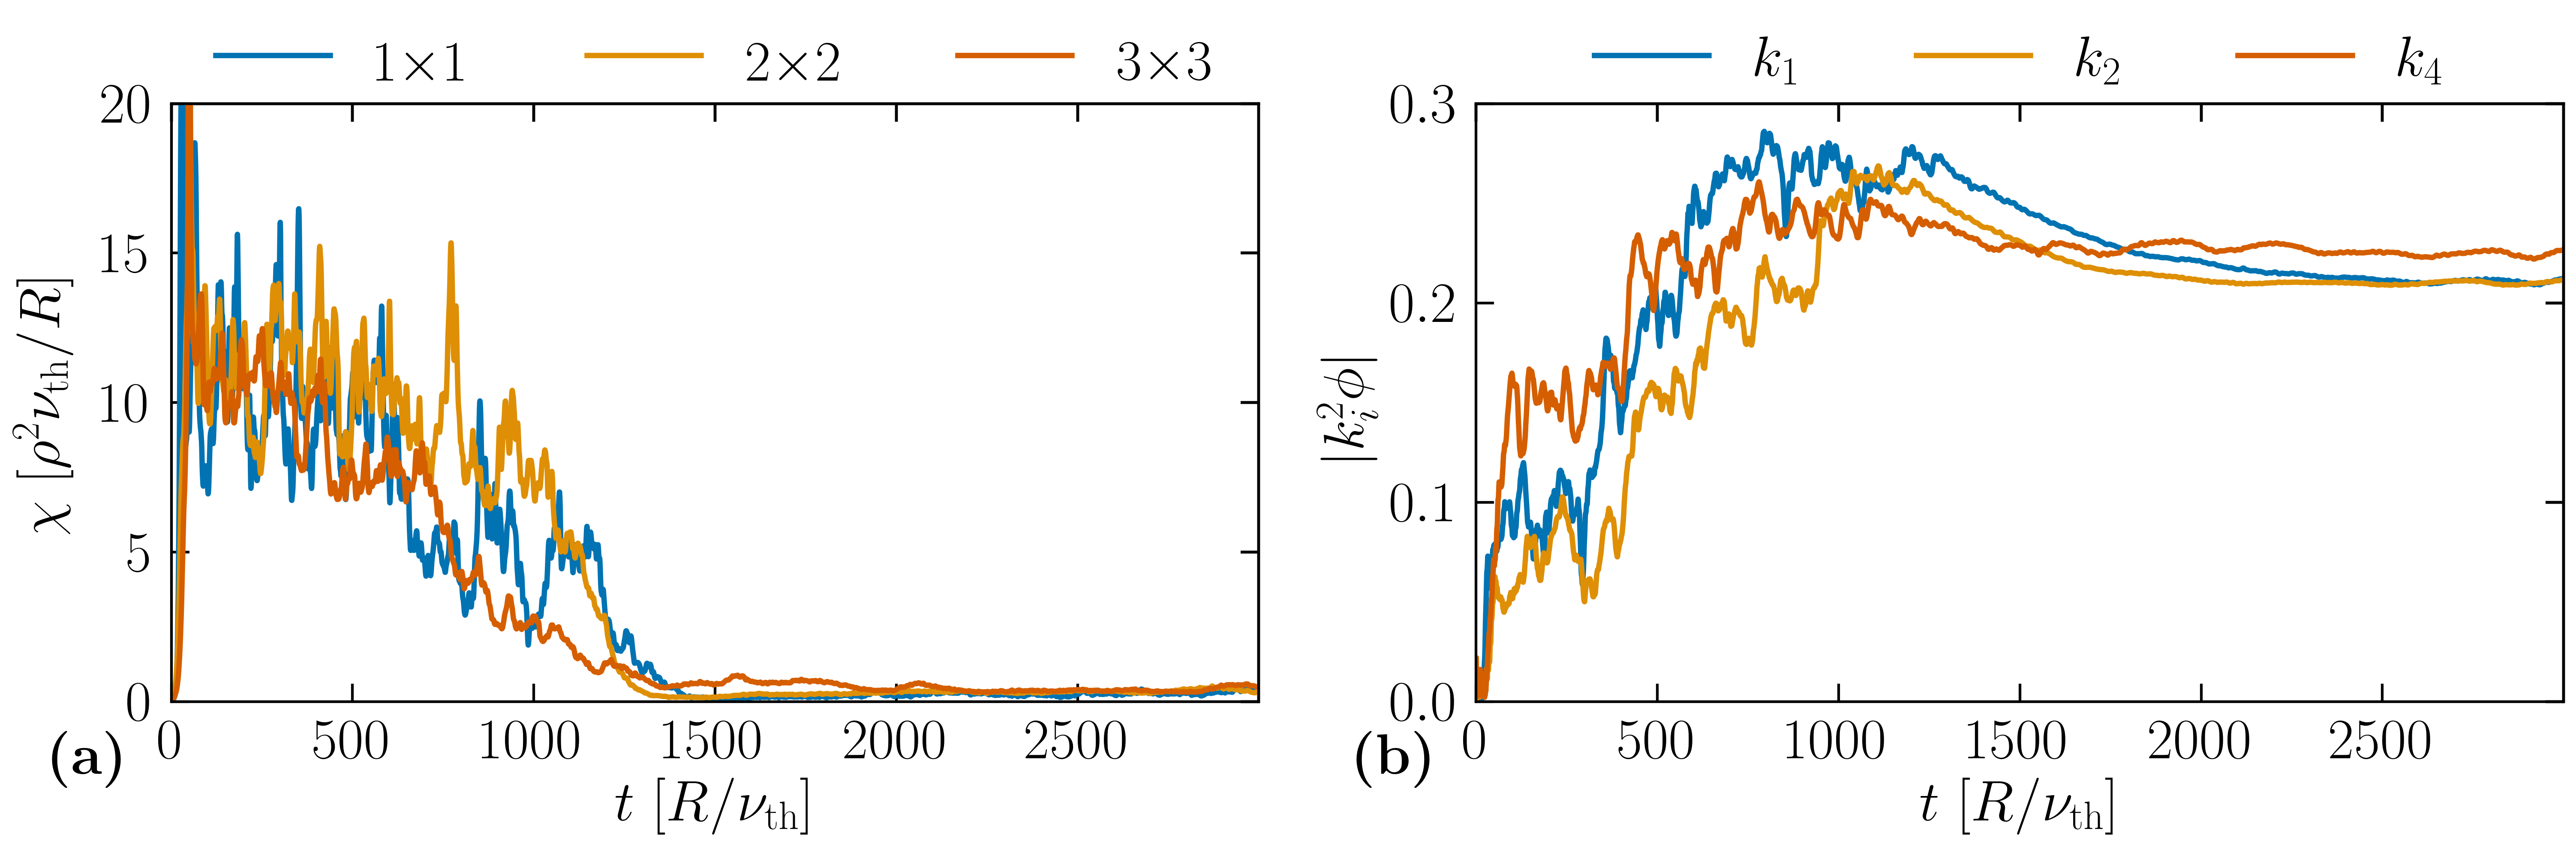

In [26]:
# Compare eflux and amplitude in time domain
fig, (ax_eflux, ax_wexb_max) = plt.subplots(1, 2, figsize = (24,6)) #, sharex=True)

boxsize = [r'1$\times$1', r'2$\times$2', r'3$\times$3']

#ax_eflux.set_title(r'$N_s$ = 16,   $N_{\mathrm{vpar}}$ = 48,   $N_{\mathrm{\mu}}$ = 9', pad=20)
ax_eflux.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux.yaxis.set_label_coords(-0.09,0.5)

ax_wexb_max.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max.set_ylabel(r'$|k_i^2 \phi|$')
ax_wexb_max.yaxis.set_label_coords(-0.09,0.5)


x_max = 0
max_index = 5000
fourier_index = [1, 2, 4]
colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']

for i, n, k in zip(f, boxsize, fourier_index):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:max_index], time[:max_index]

    ax_eflux.plot(time, eflux, label=n, color=colors[k-1], linewidth = 3)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    if x_max < time[-2]:
        x_max = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=x_max)
    ax_eflux.set_ylim(ymin=0, ymax=20)
    
    ax_eflux.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, frameon=False)
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[k][:max_index], label= r'$k_' + str(k) + r'$', color=colors[k-1], linewidth = 3)
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=x_max)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.30)
    ax_wexb_max.yaxis.set_ticks(np.arange(0, 0.40, 0.1))
    
    ax_wexb_max.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, frameon=False)

#plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.4)

plot.savefig_subplot(fig, ax_eflux   , picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_eflux_comparison.pdf'   , pad=0.02)
plot.savefig_subplot(fig, ax_wexb_max, picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_wexb_max_comparison.pdf', pad=0.02)

ax_eflux.text(-0.11, -0.12, r'\bf{(a)}', transform=ax_eflux.transAxes)
ax_wexb_max.text(-0.11, -0.12, r'\bf{(b)}', transform=ax_wexb_max.transAxes)

plt.savefig(picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_comparison.pdf', bbox_inches='tight')

##### Shearung rate $\omega_{E \times B}$

In [ ]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize3x3/Ns16/Nvpar48/Nmu9', 'boxsize2x2/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

In [ ]:
# linear growth rate
lineargrowth = pd.read_csv(homepath + 'data/linear_growthrate_ITG.dat', index_col=0)

lineargrowth_rlt = lineargrowth['gamma_N'][float(data.split('rlt')[1])]
lineargrowth_rlt_color = 'grey'

In [ ]:
# Plot parameter
%matplotlib inline
plot.parameters(True, 40, (24,8), 300, linewidth=2)

In [ ]:
# Compare shearing rate in radial domain
fig = plt.figure(1, figsize = (24,6))

ax3 = fig.add_axes([0, 0, 3/3, 1])
ax2 = fig.add_axes([0, 0, 2/3, 1])

boxsize = [r'3 \times 3', r'2 \times 2']
colors = ['#de8f05', '#d55e00']

axes = [ax3, ax2]
interval = np.array([[2000,2000],
                     [3000,3000]])

def rotate(l, n):
    return np.concatenate((l[n:],l[:n]))

i = 2

for ax, b, file in zip(axes, boxsize, f):

    if i < 2:
        ax.set_facecolor('none')        
        
        axR = ax.secondary_yaxis('right')
        axR.tick_params(direction = "out")
        axR.yaxis.set_ticklabels([])
        
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
    
    # Load shering rate and time
    eflux_data, time = zonalflow.get_eflux_time(file)
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(file)
    
    start, end = zonalflow.get_index_from_value(time,interval[0][2-i]) , zonalflow.get_index_from_value(time,interval[1][2-i])
    start_time, end_time = interval[0][2-i], interval[1][2-i]
    
    # Shearing rate with mean over time
    wexb_rad_mean, wexb_rad_middle = zonalflow.get_mean_middle_shearingrate(start, end, wexb)
    # FT{shearing rate}
    #wexb_rad_mean_amp, wexb_rad_mean_amp_max = zonalflow.get_fft_mean_max_shearingrate_amplitude(wexb_rad_mean)

    #plot.mean_shearingrate_radialcoordinate_subplot(rad_coord, rad_boxsize, wexb_rad_mean, wexb_rad_middle, wexb_rad_mean_amp_max, 
    #                                                ax, x, y, xdim, ydim, start_time, end_time)
    
    
    
    lenght = len(rad_coord)
    
    if i == 2:
        #wexb_rad_mean = rotate(wexb_rad_mean, 20)
        label_time = r' $t_\mathrm{' + b + r'} \in$ [' + str(start_time) + r', ' + str(end_time) + r']' # + '\n' + b
        
        #ax.plot(rad_coord[int(0/4*lenght):int(1/4*lenght)+1], wexb_rad_mean[int(0/4*lenght):int(1/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(1/4*lenght):int(2/4*lenght)+1], wexb_rad_mean[int(1/4*lenght):int(2/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(2/4*lenght):int(3/4*lenght)+1], wexb_rad_mean[int(2/4*lenght):int(3/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-')
        #ax.plot(rad_coord[int(3/4*lenght):int(4/4*lenght)+1], wexb_rad_mean[int(3/4*lenght):int(4/4*lenght)+1], color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.plot(rad_coord, wexb_rad_mean, color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        # linear growth rate
        ax.plot(rad_coord,  np.repeat(lineargrowth_rlt, len(rad_coord)), linewidth = 4, linestyle = 'dashed', color = lineargrowth_rlt_color)
        ax.plot(rad_coord, -np.repeat(lineargrowth_rlt, len(rad_coord)), linewidth = 4, linestyle = 'dashed', color = lineargrowth_rlt_color)
        
        ax.text(1.01, 0.74, r'\boldmath{$+\gamma$}', color = lineargrowth_rlt_color, transform=ax.transAxes)
        ax.text(1.01, 0.21, r'\boldmath{$-\gamma$}', color = lineargrowth_rlt_color, transform=ax.transAxes)
        
        ax.legend(loc='upper center', bbox_to_anchor=(2/3, 1.45), frameon=False, handlelength=1)
        
        ax.set_xticks([0, 5/6*rad_boxsize, 6/6*rad_boxsize])
        ax.set_xticklabels([str(0), str(round(5/6*rad_boxsize, 1)), str(round(5/6*rad_boxsize, 1))])
        
        axT = ax.secondary_xaxis('top')
        axT.set_xticks([0, 5/6*rad_boxsize, rad_boxsize])
        axT.set_xticklabels(['0','2.5', '3.0'])
        
    elif i == 1:
        #wexb_rad_mean = rotate(wexb_rad_mean, 60)
        label_time = r' $t_\mathrm{' + b + r'} \in$ [' + str(start_time) + r', ' + str(end_time) + r']' # + '\n' + b
    
        #ax.plot(rad_coord[int(0/1*lenght):int(1/1*lenght)+1], wexb_rad_mean[int(0/1*lenght):int(1/1*lenght)+1], color=colors[i-1], linewidth = 4, label = label_time)
        
        ax.plot(rad_coord, wexb_rad_mean, color=colors[i-1], linewidth = 4, linestyle='-', label = label_time)
        
        ax.legend(loc='upper center', bbox_to_anchor=(1/2, 1.45), frameon=False, handlelength=1)
        
        ax.set_xticks([1/4*rad_boxsize, 2/4*rad_boxsize, 3/4*rad_boxsize, rad_boxsize])
        ax.set_xticklabels([str(round(1/4*rad_boxsize, 1)), str(round(2/4*rad_boxsize, 1)), str(round(3/4*rad_boxsize, 1)), str(round(rad_boxsize, 1))])
        
        axT = ax.secondary_xaxis('top')
        axT.set_xticks([1/4*rad_boxsize, 2/4*rad_boxsize, 3/4*rad_boxsize, rad_boxsize])
        axT.set_xticklabels(['0.5', '1.0', '1.5', '2.0'])
        
        ax.set_xlabel(r'$\psi~[\rho]$')
        ax.xaxis.set_label_coords(3/4, -0.14, transform=ax.transAxes)
        
        ax.set_ylabel(r'$\omega_{\mathrm{E \times B}}~[\nu_{\mathrm{th}}/R]$')
        ax.yaxis.set_label_coords(-0.1, 0.5, transform=ax.transAxes)

        axT.set_xlabel(r'box size')
        axT.xaxis.set_label_coords(3/4, 1.14, transform=ax.transAxes)
        
        
    
    ax.set_xlim(xmin=0, xmax = rad_boxsize)
    ax.set_ylim(ymin=-0.4, ymax = 0.4)
    
    i -= 1

#plt.savefig(picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_comparison.pdf', bbox_inches='tight')

#plt.savefig(picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_comparison.png', bbox_inches='tight', transparent = True)



#### Boxsize 2xY, 3xY

In [27]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize2x1/Ns16/Nvpar48/Nmu9', 'boxsize2x2/Ns16/Nvpar48/Nmu9',
        'boxsize3x1/Ns16/Nvpar48/Nmu9', 'boxsize3x3/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

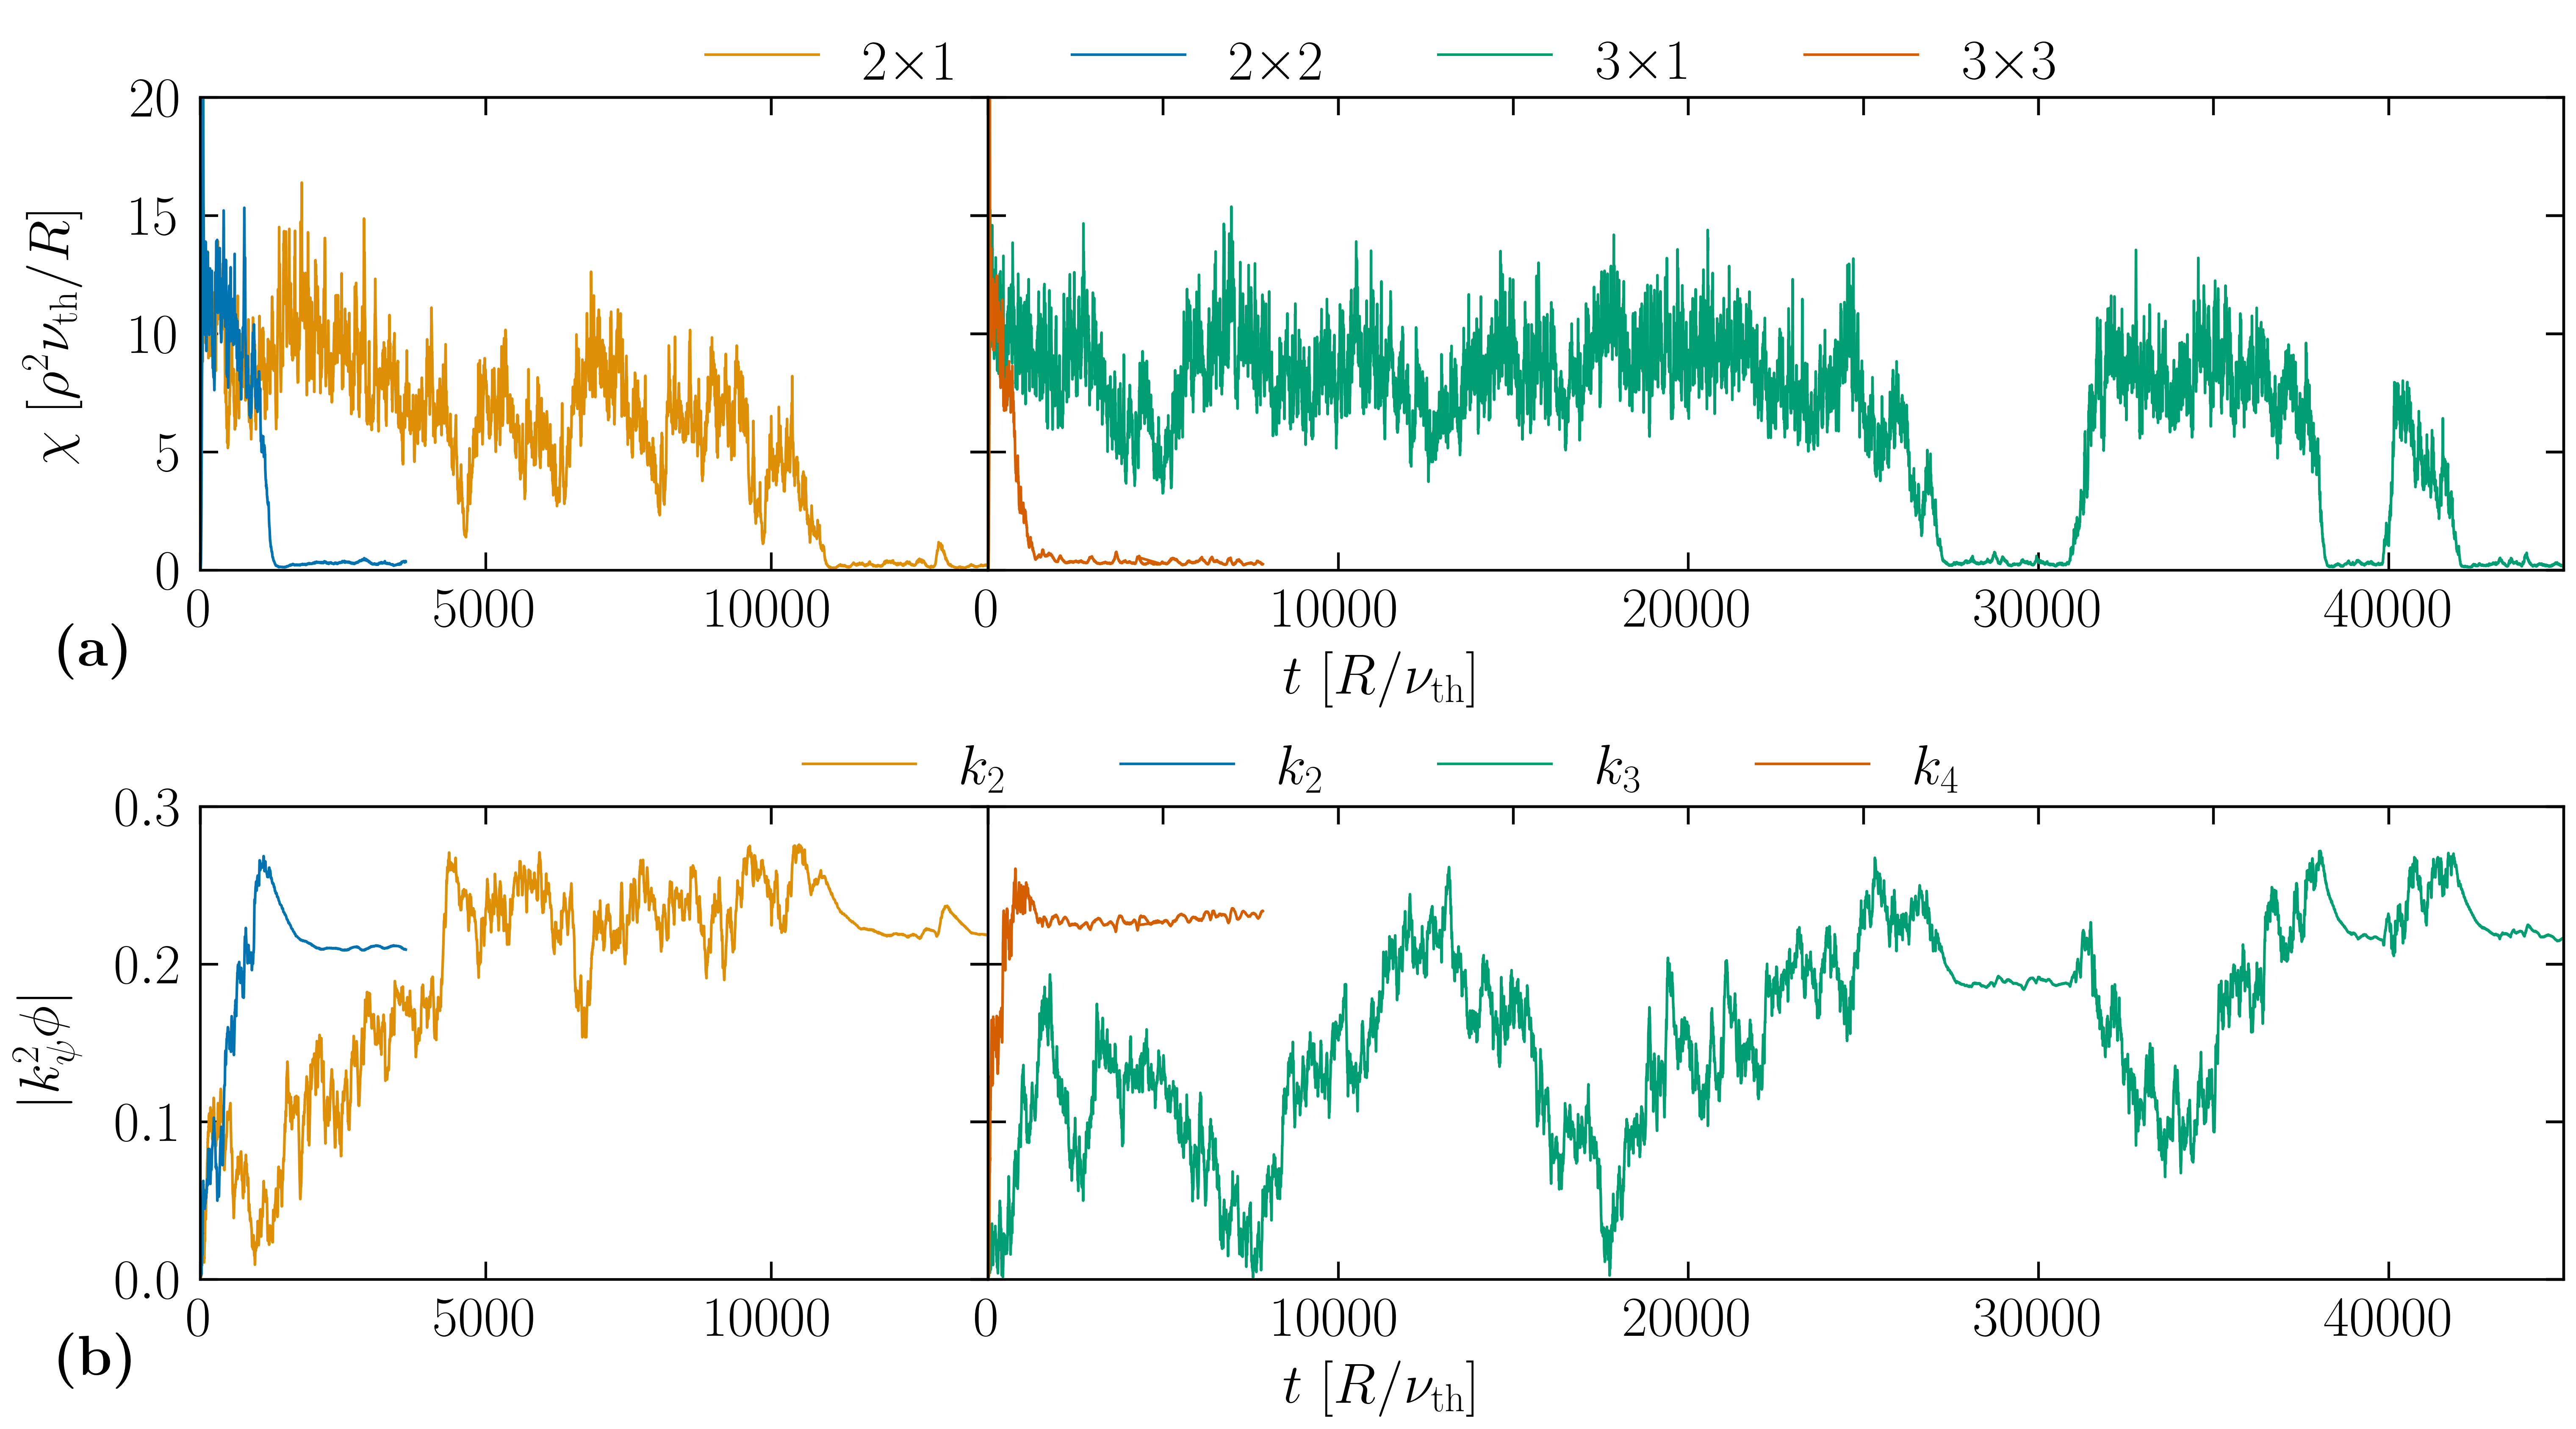

In [28]:
# Compare eflux and amplitude in time domain
fig, ((ax_eflux2, ax_eflux3), (ax_wexb_max2, ax_wexb_max3)) = plt.subplots(2, 2, figsize = (24,12), gridspec_kw={'width_ratios': [1, 2]}) #, sharex=True)

boxsize = [r'2$\times$1', r'2$\times$2', r'3$\times$1', r'3$\times$3']

ax_eflux_list = [ax_eflux2, ax_eflux2, ax_eflux3, ax_eflux3]
ax_wexb_max_list = [ax_wexb_max2, ax_wexb_max2, ax_wexb_max3, ax_wexb_max3]

ax_eflux2.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux2.xaxis.set_label_coords(1.5, -0.17)

ax_wexb_max2.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max2.xaxis.set_label_coords(1.5, -0.17)

ax_eflux2.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux2.yaxis.set_label_coords(-0.15, 0.5)

ax_wexb_max2.set_ylabel(r'$|k_\psi^2 \phi|$')
ax_wexb_max2.yaxis.set_label_coords(-0.15, 0.5)

x_max = 0
max_index = [23000,6000, 75000, None]
fourier_index = [2, 2, 3, 4]

colors = ['#de8f05', '#0173b2', '#029e73', '#d55e00']


for i, n, k, c, a, ax_eflux, ax_wexb_max in zip(f, boxsize, fourier_index, colors, max_index, ax_eflux_list, ax_wexb_max_list):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:a], time[:a]

    ax_eflux.plot(time, eflux, label=n, color=c)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    if x_max < time[-2]:
        x_max = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=x_max)
    ax_eflux.set_ylim(ymin=0, ymax=20)
    
    #ax_eflux.legend(loc=(0.8, 0.67))
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[k][:a], label= r'$k_' + str(k) + r'$', color=c)
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=x_max)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.30)
    
    #ax_wexb_max.legend(loc=(0.915, 0.03))

handles_eflux, labels_eflux = [(a + b) for a, b in zip(ax_eflux2.get_legend_handles_labels(), ax_eflux3.get_legend_handles_labels())]
handles_wexb_max, labels_wexb_max = [(a + b) for a, b in zip(ax_wexb_max2.get_legend_handles_labels(), ax_wexb_max3.get_legend_handles_labels())]

ax_eflux2.legend(handles_eflux ,labels_eflux, loc='upper center', bbox_to_anchor=(1.5, 1.24), ncol=4, frameon=False)
ax_wexb_max2.legend(handles_wexb_max ,labels_wexb_max, loc='upper center', bbox_to_anchor=(1.5, 1.24), ncol=4, frameon=False)

ax_eflux3.set_yticklabels([])
ax_eflux3.xaxis.set_ticks(np.arange(0, x_max, 10000))
ax_wexb_max3.set_yticklabels([])
ax_wexb_max3.xaxis.set_ticks(np.arange(0, x_max, 10000))

plt.subplots_adjust(top=0.9, wspace=0, hspace=0.5)

plot.savefig_subplot(fig, ax_eflux2, picDir + '/S6_rlt6.0_boxsize2x1-2-3x1-3_Ns16_Nvpar48_Nmu9_eflux_comparison.pdf'   , pad=0.02, bbox_input=bbox_ax_eflux)
plot.savefig_subplot(fig, ax_wexb_max2, picDir + '/S6_rlt6.0_boxsize2x1-2-3x1-3_Ns16_Nvpar48_Nmu9_wexb_max_comparison.pdf', pad=0.02, bbox_input=bbox_ax_wexb_max)

ax_eflux2.text(-0.18, -0.2, r'\bf{(a)}', transform=ax_eflux2.transAxes)
ax_wexb_max2.text(-0.18, -0.2, r'\bf{(b)}', transform=ax_wexb_max2.transAxes)

plt.savefig(picDir + '/S6_rlt6.0_boxsize2x1-2-3x1-3_Ns16_Nvpar48_Nmu9_comparison.pdf', bbox_inches='tight')